# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [3]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


In [4]:
import tensorflow as tf
print(dir(tf.keras))

['DTypePolicy', 'FloatDTypePolicy', 'Function', 'Initializer', 'Input', 'InputSpec', 'KerasTensor', 'Layer', 'Loss', 'Metric', 'Model', 'Operation', 'Optimizer', 'Quantizer', 'Regularizer', 'Sequential', 'StatelessScope', 'SymbolicScope', 'Variable', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'activations', 'applications', 'backend', 'callbacks', 'config', 'constraints', 'datasets', 'device', 'distribution', 'dtype_policies', 'export', 'initializers', 'layers', 'legacy', 'losses', 'metrics', 'mixed_precision', 'models', 'name_scope', 'ops', 'optimizers', 'preprocessing', 'quantizers', 'random', 'regularizers', 'tree', 'utils', 'version', 'visualization', 'wrappers']


In [5]:
from keras.datasets import cifar10
from keras.utils import to_categorical

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


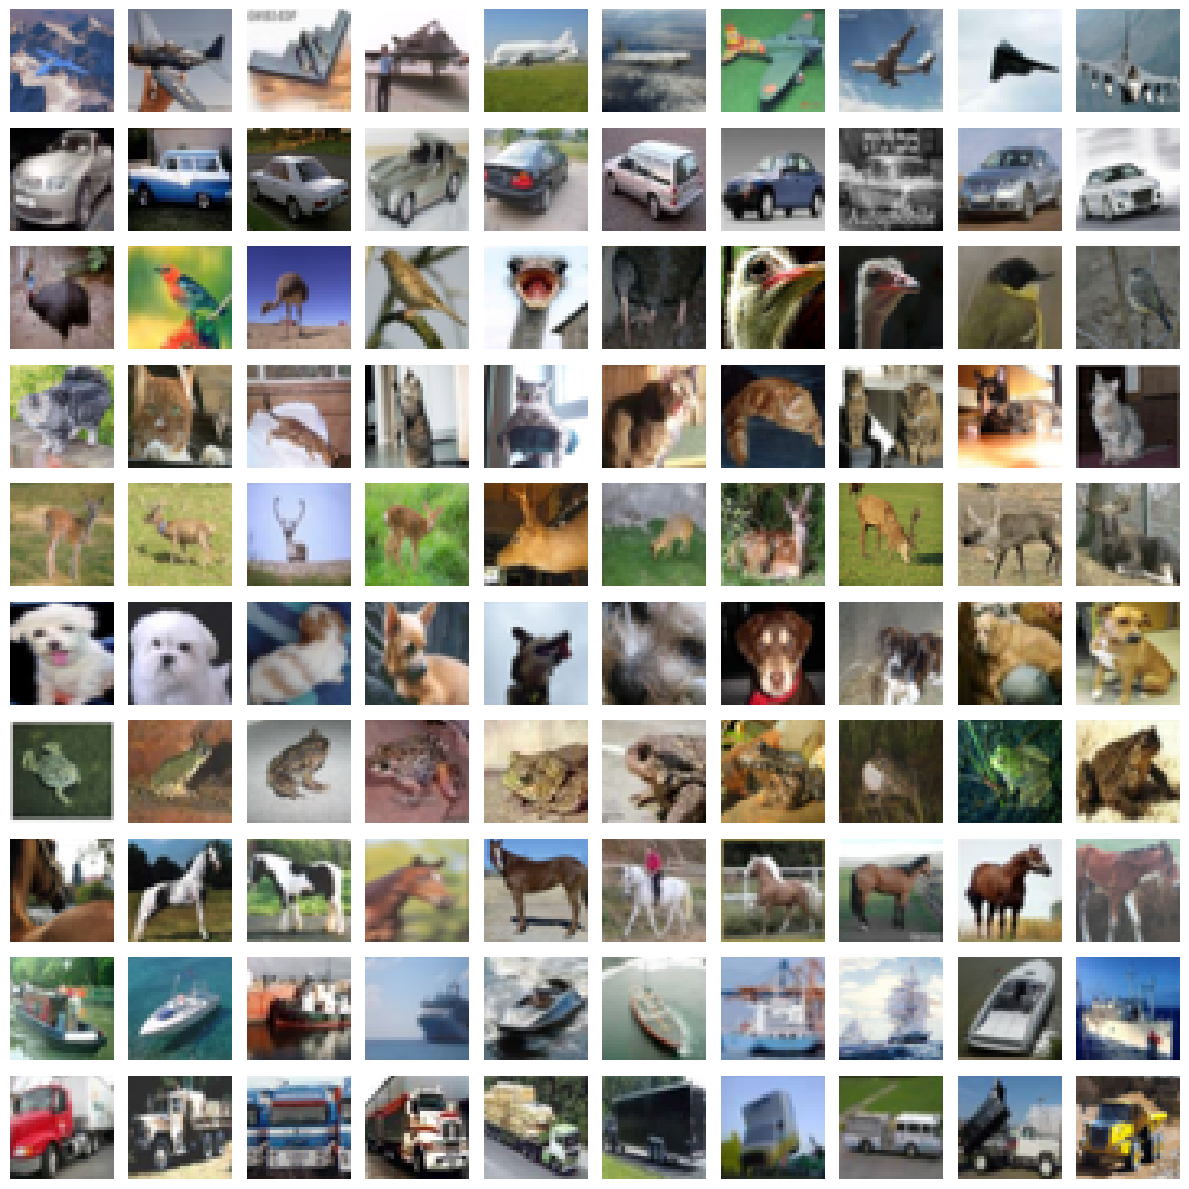

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12, 12))

for i in range(10):
    class_indices = np.where(y_train == i)[0]
    random_samples = np.random.choice(class_indices, 10, replace=False)

    for j in range(10):
        plt.subplot(10, 10, i * 10 + j + 1)
        plt.imshow(x_train[random_samples[j]])
        plt.axis('off')
        if j == 0:
            plt.ylabel(class_names[i], rotation=0, labelpad=30, fontsize=10)

plt.tight_layout()
plt.show()

In [8]:
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

In [9]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [11]:
from keras.backend import clear_session
clear_session()

Simple CNN

In [12]:
def create_simple_model():
    model = tf.keras.Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

In [13]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [14]:
model = create_simple_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
history = model.fit(x_train_normalized, y_train_encoded,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_test_normalized, y_test_encoded))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.1447 - loss: 2.2773 - val_accuracy: 0.2127 - val_loss: 2.1873
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2357 - loss: 2.1519 - val_accuracy: 0.2625 - val_loss: 2.0688
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2802 - loss: 2.0395 - val_accuracy: 0.3037 - val_loss: 1.9729
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3134 - loss: 1.9598 - val_accuracy: 0.3195 - val_loss: 1.9252
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3379 - loss: 1.9058 - val_accuracy: 0.3465 - val_loss: 1.8791
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3514 - loss: 1.8702 - val_accuracy: 0.3440 - val_loss: 1.8511
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3684 - loss: 1.8313 - val_accuracy: 0.3538 - val_loss: 1.8335
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3718 - loss: 1.8100 - val_accuracy: 0.3539 - v

*   Plot the cross entropy loss curve and the accuracy curve

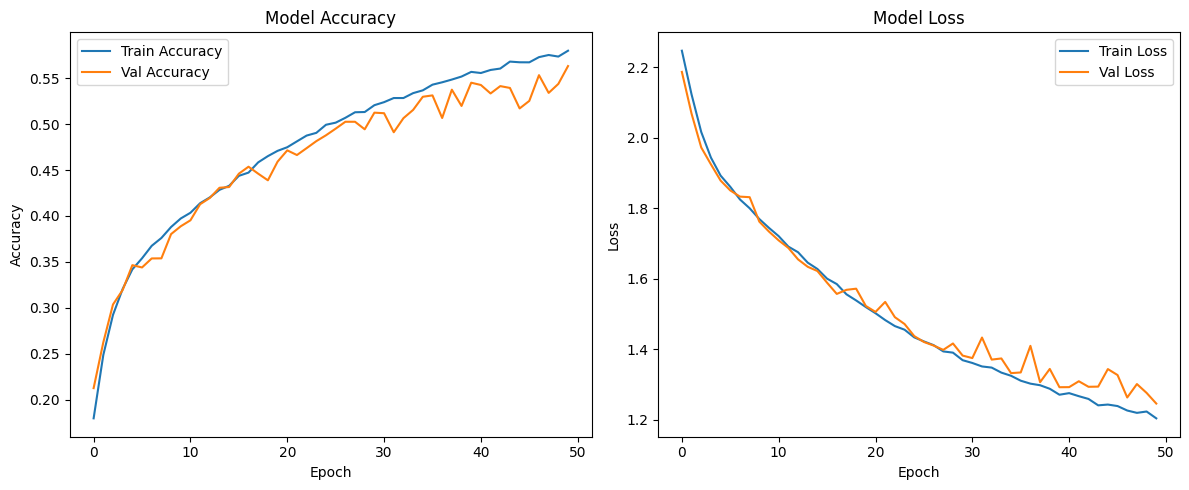

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
model.save('simple_cnn_model.h5')

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [49]:
def create_vgg_model():
    model = tf.keras.Sequential()

    # Stack two convolutional layers with 64 filters
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Stack two convolutional layers with 128 filters
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Stack two convolutional layers with 256 filters
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output and add dense layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [50]:
# Evaluate the simple CNN model on the test set
loss_simple_cnn, accuracy_simple_cnn = model.evaluate(x_test_normalized, y_test_encoded, verbose=0)
print(f"Simple CNN Test Accuracy: {accuracy_simple_cnn:.4f}")
print(f"Simple CNN Test Loss: {loss_simple_cnn:.4f}")

# Create and train the VGG model before evaluating
from keras.backend import clear_session
clear_session()
model_vgg = create_vgg_model()
model_vgg.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Resize the images to 64x64
import tensorflow as tf
x_train_resized = tf.image.resize(x_train_normalized, (64, 64))
x_test_resized = tf.image.resize(x_test_normalized, (64, 64))


history_vgg = model_vgg.fit(x_train_resized, y_train_encoded,
                            epochs=50,
                            batch_size=512,
                            validation_data=(x_test_resized, y_test_encoded))


# Evaluate the VGG model on the test set
loss_vgg, accuracy_vgg = model_vgg.evaluate(x_test_resized, y_test_encoded, verbose=0)
print(f"VGG Test Accuracy: {accuracy_vgg:.4f}")
print(f"VGG Test Loss: {loss_vgg:.4f}")

Simple CNN Test Accuracy: 0.1000
Simple CNN Test Loss: nan


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 392ms/step - accuracy: 0.0935 - loss: 2.3008 - val_accuracy: 0.1089 - val_loss: 2.2931
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 370ms/step - accuracy: 0.1200 - loss: 2.2882 - val_accuracy: 0.1650 - val_loss: 2.2598
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 370ms/step - accuracy: 0.1873 - loss: 2.2295 - val_accuracy: 0.2317 - val_loss: 2.1199
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 366ms/step - accuracy: 0.2415 - loss: 2.1036 - val_accuracy: 0.2431 - val_loss: 2.0451
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 370ms/step - accuracy: 0.2795 - loss: 2.0154 - val_accuracy: 0.2770 - val_loss: 2.0077
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 366ms/step - accuracy: 0.3222 - loss: 1.9329 - val_accuracy: 0.3400 - val_loss: 1.8859
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 367ms/step - accuracy: 0.3402 - loss: 1.8647 - val_accuracy: 0.3620 - val_loss: 1.7867
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 367ms/step - accuracy: 0.3568 - loss: 1.8212 - val_accu

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


In [ ]:
model_complete_vgg.save('complete_vgg_model.keras')

**Comment on the observation**

The VGG model's performance is significantly better than the simple CNN you trained and much better than random chance.
However, compared to highly optimized and larger models specifically designed for CIFAR-10, there is still room for improvement.

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


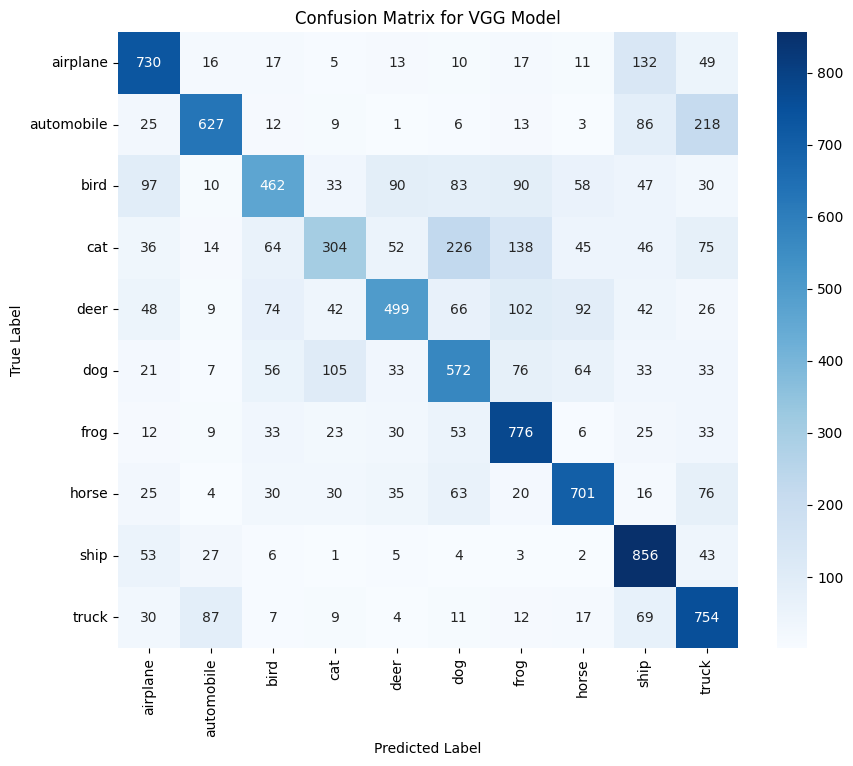

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred_vgg = model_vgg.predict(x_test_resized)
y_pred_classes_vgg = np.argmax(y_pred_vgg, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes_vgg)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for VGG Model')
plt.show()

**Comment here :**

There are common miscalssifications, among the animal classes.
We can see that cats are often missclassifed as dogs. You can see that the confusion matrix shows a significant number of istances where true cats are predicted as dogs (226)

*    Print the test accuracy for the trained model.

VGG Test Accuracy: 0.6281
VGG Test Loss: 1.1777

## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [ ]:
# Your code here :

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:
Without activation functions, my neural network would behave like a simple liniar model (no matter how many layers I add).

2 - Key Differences between sigmoid and softmax:
Sigmoid: Used for binary classification. Output often is yes/no
Softmax: Used for multi-class classifications. Output: choosing one class among many.

3 - Key Differences between categorical crossentropy and binary crossentropy loss:
Binary Crossentropy: Binary classification ( 2 classes). Output: sigmoid. Uses cases: User login attempts , fraud detection.
Cateogrical Crossentropy: Multi-class classification. Output: softmax. Use cases: Image classification (recognizing images), document categorization , medical diagnosis